C:\Users\M\AppData\Local\Temp\ipykernel_1212\3417452370.py:26: RuntimeWarning: divide by zero encountered in divide
  return const.h*const.c/E*1e9/const.elementary_charge


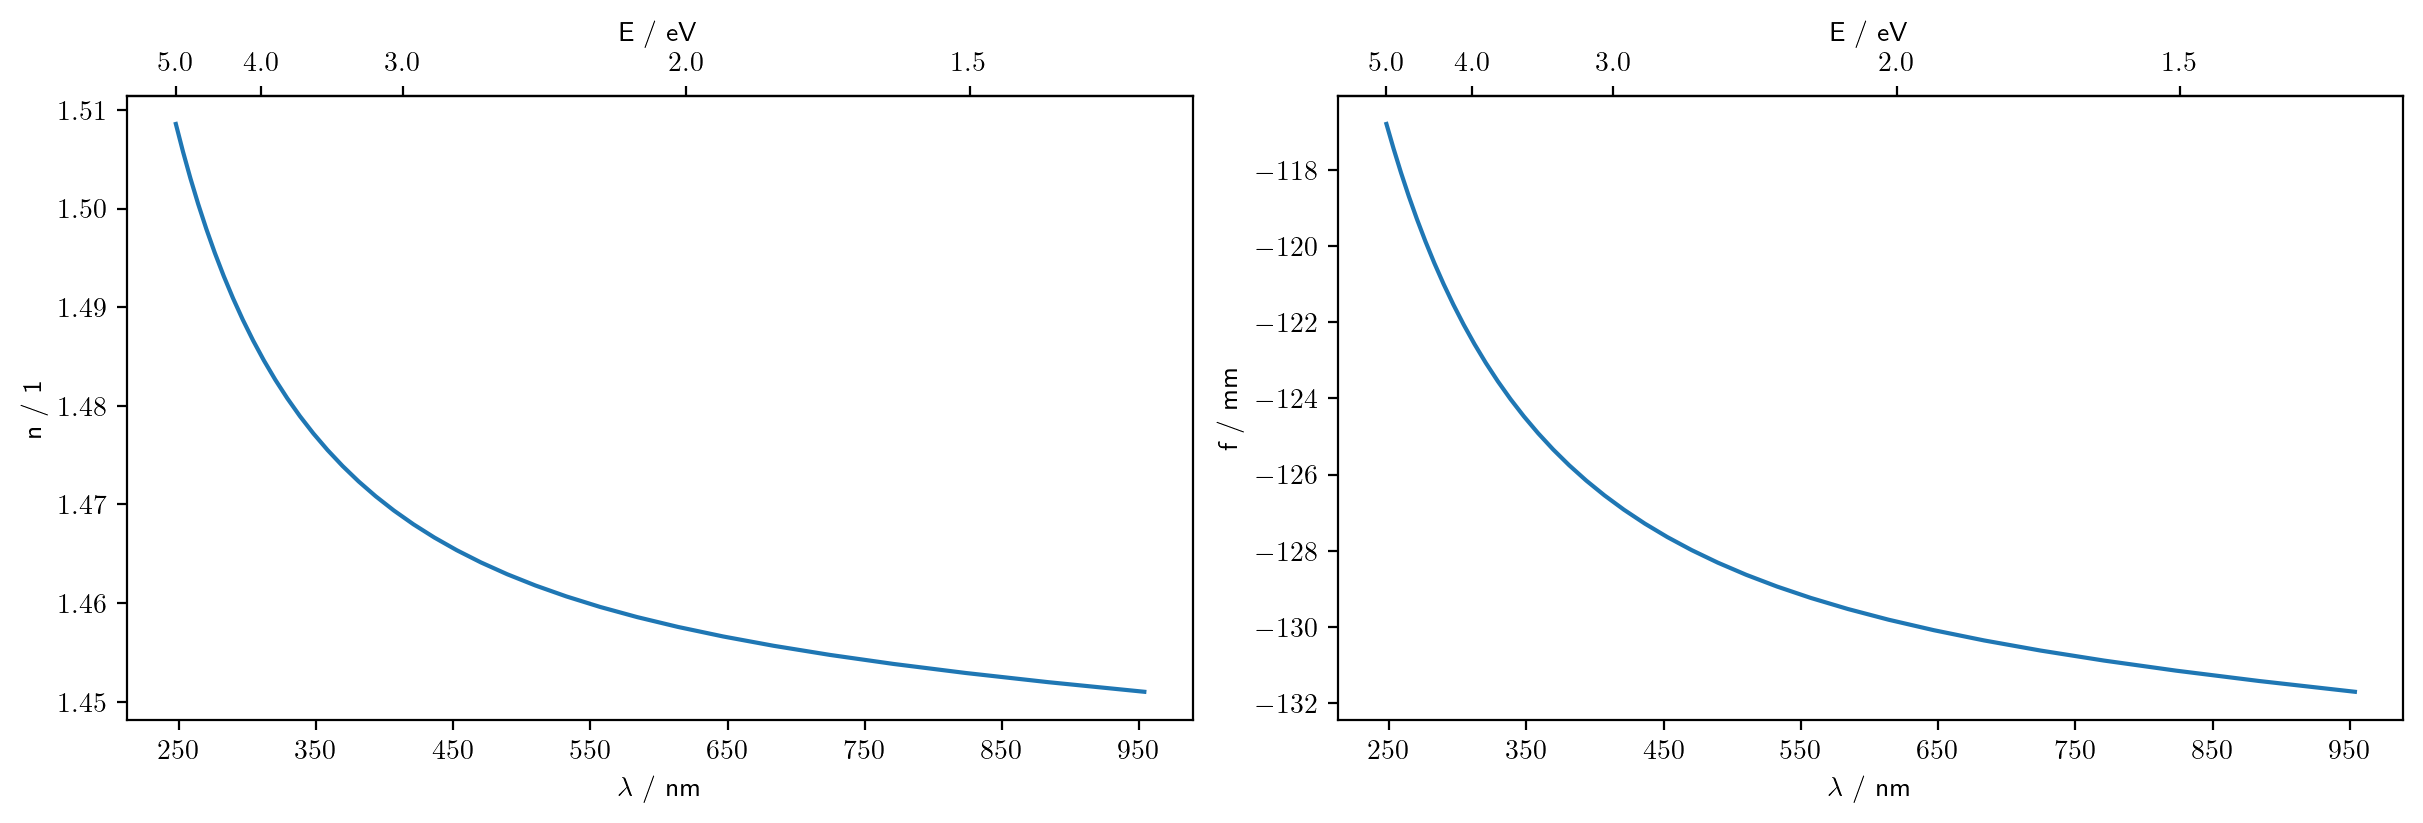

In [45]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import constants as const
plt.rcParams['text.usetex'] = True

#Sellmeier equation
def n_squared(lamb, coeffs):
    n2 = 1
    lsquare = lamb**2
    for index in range(3):
        n2 = n2 + coeffs[index, 0]*lsquare/(lsquare-coeffs[index, 1]**2)
    return n2

#Lensmaker equation
def lensmaker(n, R1, R2, d=0):
    '''Returns 1/focal length'''
    f_inv = (n-1)*(1/R1 - 1/R2 + (n-1)*d/(n*R1*R2))
    return f_inv

def wavToEnergy(lamb):
    #Energy in eV, lamb in nm
    return const.h*const.c/lamb*1e9/const.elementary_charge

def energyToWav(E):
    #Energy in eV, lamb in nm
    return const.h*const.c/E*1e9/const.elementary_charge



#https://refractiveindex.info/?shelf=glass&book=fused_silica&page=Malitson
#Maltison 1965 UV fused silica: 0.21 µm - 3.71 µm
coeffsUVFS = np.array([[0.6961663, 0.0684043], [0.4079426, 0.1162414], [0.8974794, 9.896161]])

#Energy range is 1.3 eV to 5 eV in .1 eV steps
energies = np.linspace(1.3, 5, 37)*const.elementary_charge
wavs = const.h*const.c/energies


fig, axs = plt.subplots(1,2, layout='constrained', figsize = (12,4), dpi=200)
#µm for sellmeier
n_wav = np.sqrt(n_squared(wavs*1e6, coeffsUVFS))
axs[0].plot(wavs*1e9, n_wav)
axs[0].set_ylabel('n / 1')
axs[0].set_xlabel(r'$\lambda$ / nm')
axs[0].set_xticks(np.arange(250, 951, 100))
secax0 = axs[0].secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
secax0.set_xticks([1.5, 2, 3, 4, 5])
secax0.set_xlabel("E / eV")

#second part with focal distance
focal_distance = lensmaker(n_wav, np.inf, 59.4)
focal_distance = 1/focal_distance
axs[1].plot(wavs*1e9, focal_distance)
axs[1].set_ylabel('f / mm')
axs[1].set_xlabel(r'$\lambda$ / nm')
axs[1].set_xticks(np.arange(250, 951, 100))

secax1 = axs[1].secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
secax1.set_xticks([1.5, 2, 3, 4, 5])
secax1.set_xlabel("E / eV")

plt.show()
